In [2]:
import zipfile
with zipfile.ZipFile('C:/Users/aqili/Downloads/10_food_classes_all_data.zip', 'r') as zip_ref:
    zip_ref.extractall()

(-0.5, 511.5, 383.5, -0.5)

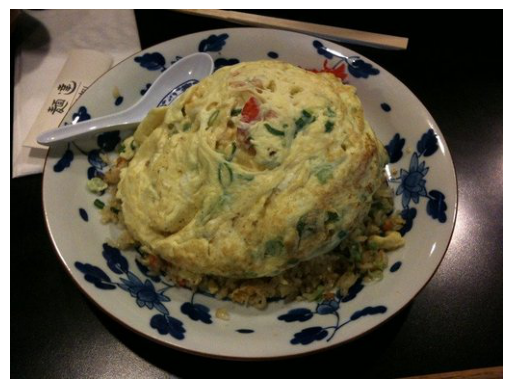

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('10_food_classes_all_data/train/fried_rice/10605.jpg')
plt.imshow(img)
plt.axis('off')

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = IMAGE_SHAPE,
                                              batch_size = BATCH_SIZE,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMAGE_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


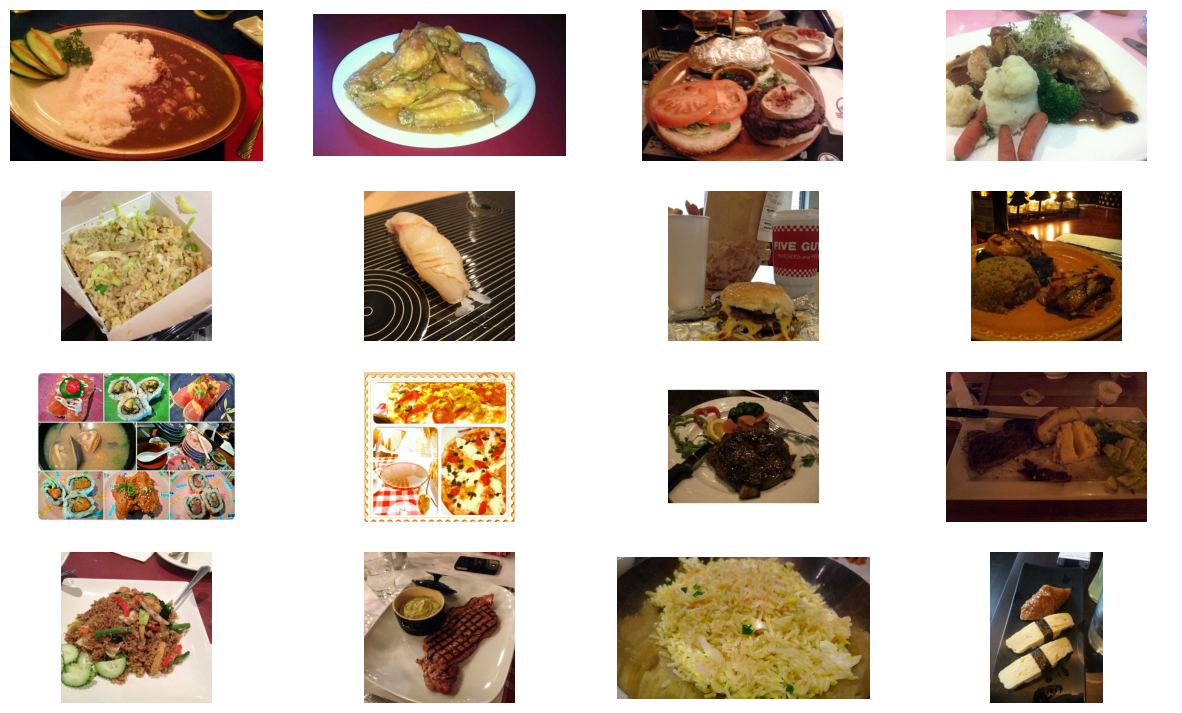

In [5]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))

plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(16):
  n += 1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4, 4, n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

# ResNet50

In [6]:
resnet_50 = tf.keras.applications.ResNet50(include_top = False)

In [7]:
for layer in resnet_50.layers:
    layer.trainable = False

In [8]:
for layer in resnet_50.layers:
    print(layer.name,layer.trainable)

input_layer False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2

In [9]:
model_t = tf.keras.Sequential([
    tf.keras.layers.Input(shape = IMAGE_SHAPE + (3,)),
    resnet_50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = 'softmax')
])

model_t.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

model_t.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14336)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       143,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,731,082 (90.53 MB)

 Trainable params: 143,370 (560.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
history_t = model_t.fit(train_data,epochs = 5,batch_size = 32,
                       validation_data = test_data)

Epoch 1/5


C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.1247 - loss: 2.3219 - val_accuracy: 0.1828 - val_loss: 2.2265
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 529ms/step - accuracy: 0.1896 - loss: 2.2067 - val_accuracy: 0.2000 - val_loss: 2.1954
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 534ms/step - accuracy: 0.2137 - loss: 2.1550 - val_accuracy: 0.1612 - val_loss: 2.2559
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 128s 539ms/step - accuracy: 0.2242 - loss: 2.1421 - val_accuracy: 0.2136 - val_loss: 2.1355
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 129s 542ms/step - accuracy: 0.2487 - loss: 2.1086 - val_accuracy: 0.2220 - val_loss: 2.1466


In [23]:
efficient = tf.keras.applications.EfficientNetB0(include_top =False)

for layer in efficient.layers:
    layer.trainable = False

In [27]:
for layer in efficient.layers:
    print(layer.name,layer.trainable)

input_layer_4 False
rescaling_4 False
normalization_2 False
rescaling_5 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
bl

In [39]:
inputs = tf.keras.layers.Input(shape = IMAGE_SHAPE +(3,))
base_model = effecient(inputs)
x = tf.keras.layers.Flatten()(base_model)
outputs = tf.keras.layers.Dense(10,activation = 'softmax')(x)

model = tf.keras.Model(inputs,outputs)

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       627,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,676,781 (17.84 MB)

 Trainable params: 4,634,758 (17.68 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [41]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data,epochs = 5,batch_size = 32,
                   validation_data = test_data)

Epoch 1/5


C:\Users\aqili\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/235 ━━━━━━━━━━━━━━━━━━━━ 4:49 5s/step - accuracy: 0.5415 - loss: 2.0580